In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import os

In [3]:
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")

print("Loading data...")
spectra_data = pd.read_csv(
    "../3. read and make single dataset/p60_spectra_for_unsupervised.csv", index_col=0
)
print(f"Loaded data with shape: {spectra_data.shape}")

print("Loading metadata...")

Loading data...
Loaded data with shape: (6040, 214)
Loading metadata...


In [4]:
try:
    metadata = pd.read_csv("../1. download ALL wise data/wiserep_spectra_combined.csv")
    # Extract P60 data only
    p60_metadata = metadata[metadata["Telescope"] == "P60"].copy()
    
    # Create mapping from object name to SN type
    sn_type_map = {}
    for _, row in p60_metadata.iterrows():
        ascii_file = row.get("Ascii file", "")
        if ascii_file:
            object_name = ascii_file.split("_")[0]
            sn_type = row.get("Obj. Type", "Unknown")
            sn_type_map[object_name] = sn_type

    spectra_data["SN_Type"] = spectra_data.index.map(
        lambda x: sn_type_map.get(x, "Unknown")
    )
    print(
        f"Added SN type information to {sum(spectra_data['SN_Type'] != 'Unknown')} spectra"
    )
except Exception as e:
    print(f"Error loading metadata: {e}")
    print("Continuing without SN type information")
    spectra_data["SN_Type"] = "Unknown"

Added SN type information to 6040 spectra


In [5]:
spectra_data

,3798.816981112112,3824.268382981271,3849.7197848504297,3875.1711867195886,3900.6225885887475,3926.0739904579063,3951.525392327065,3976.976794196224,4002.428196065383,4027.879597934542,...,9016.35436428968,9041.80576615884,9067.257168027998,9092.708569897157,9118.159971766316,9143.611373635475,9169.062775504633,9194.514177373792,9219.965579242951,SN_Type
object_name,,,,,,,,,,,,,,,,,,,,,
2016al,NaN,-0.446487,1.000000,0.688117,0.124609,0.213864,0.537586,0.348094,0.603551,0.706524,...,0.088522,0.085840,0.079184,0.082659,0.078244,0.049994,0.045429,NaN,NaN,SN Ia
2016am,NaN,-0.014088,0.587648,0.537381,0.879620,0.396862,0.292420,0.812706,0.567693,0.520243,...,0.259472,0.253911,0.221505,0.220823,0.225413,0.223710,0.217723,NaN,NaN,SN Ia
2016bld,NaN,-0.071703,-0.044067,-0.150936,-0.137172,-0.004433,-0.084392,0.173121,0.326348,0.347203,...,0.734724,0.724043,0.759839,0.795027,0.799886,0.735951,0.754050,NaN,NaN,SN Ia
2016cok,NaN,0.885432,0.805263,0.868404,0.688214,0.756615,0.827972,0.722370,0.909177,0.721569,...,0.296657,0.291972,0.292109,0.299268,0.305233,0.304421,0.304362,NaN,NaN,SN IIP
2016coo,NaN,-0.865105,-0.418752,0.016306,-0.087951,-0.545480,0.059865,0.942116,0.434564,0.955382,...,-0.017630,0.023201,0.062859,0.104479,0.137886,0.151441,0.115151,NaN,NaN,SN Ia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iPTF16hgm,NaN,1.000000,0.907938,0.700610,0.687282,0.737575,0.896894,0.872286,0.759123,0.883472,...,0.255673,0.261187,0.264137,0.263981,0.259717,0.247877,0.229603,0.216328,0.218064,SN II
iPTF16ied,NaN,0.804570,0.475579,-0.090659,-0.044416,-0.211680,-0.031452,0.333314,0.197204,-0.303763,...,0.180611,0.184683,0.224908,0.256197,0.274147,0.266844,0.247138,0.232113,0.234629,SN IIP
iPTF16ilg,NaN,0.129549,0.408256,0.281446,-0.118444,-0.069761,0.296362,0.458746,0.687520,0.721292,...,0.571850,0.567955,0.564074,0.540959,0.528133,0.549866,0.567556,0.578290,0.575239,SN Ic


In [6]:
output_dir = "poster_figures"
os.makedirs(output_dir, exist_ok=True)

In [7]:
print("Preprocessing data...")
X = spectra_data.iloc[:, :-1].values  # Exclude SN_Type column
wavelengths = spectra_data.columns[:-1].astype(float).values  # Get wavelength values

Preprocessing data...


In [8]:
print("Imputing missing values...")
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

Imputing missing values...


In [9]:
print("Scaling data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

Scaling data...


In [10]:
print("Performing PCA...")
pca = PCA(n_components=10)
pca_result = pca.fit_transform(X_scaled)

Performing PCA...


In [11]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

Explained variance ratio: [0.71293008 0.11017378 0.03654321 0.02332055 0.01680017 0.01305809
 0.00642414 0.00524714 0.00475799 0.00413433]
Cumulative explained variance: [0.71293008 0.82310386 0.85964707 0.88296763 0.8997678  0.91282589
 0.91925003 0.92449716 0.92925516 0.93338949]


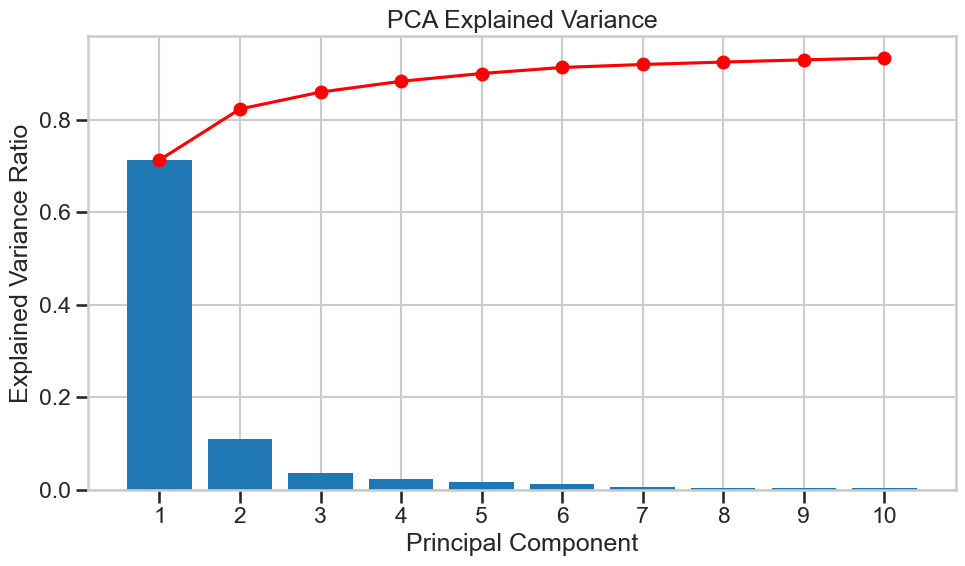

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), "r-o")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance")
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{output_dir}/pca_explained_variance.png", dpi=300)

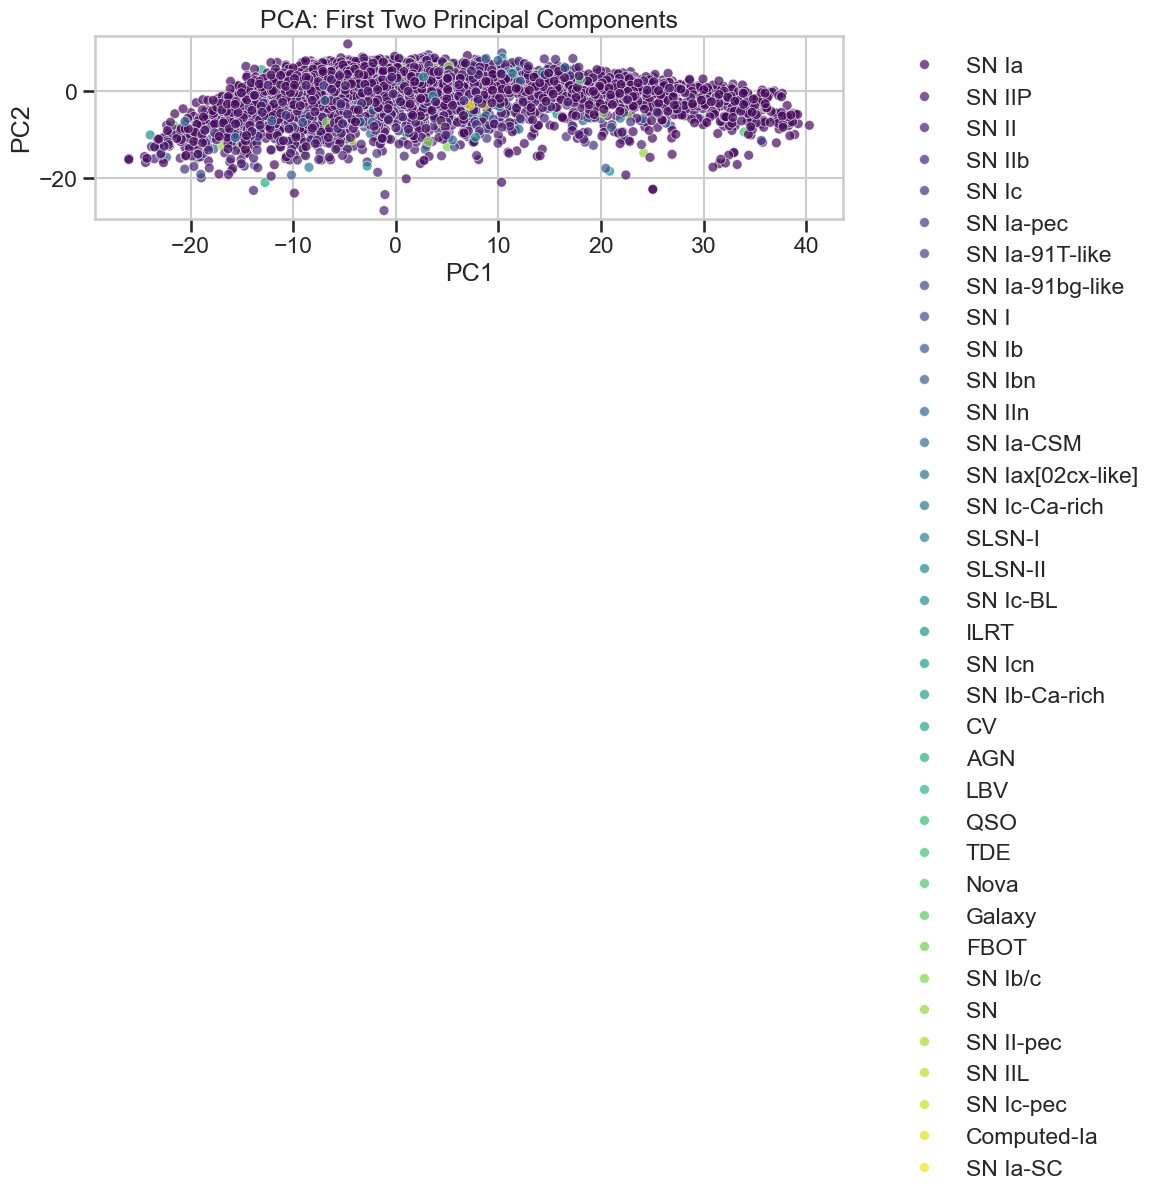

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=spectra_data["SN_Type"] if "SN_Type" in spectra_data else None,
    palette="viridis",
    alpha=0.7,
    s=50,
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: First Two Principal Components")
plt.grid(True)
if "SN_Type" in spectra_data and sum(spectra_data["SN_Type"] != "Unknown") > 0:
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig(f"{output_dir}/pca_first_two_components.png", dpi=300)

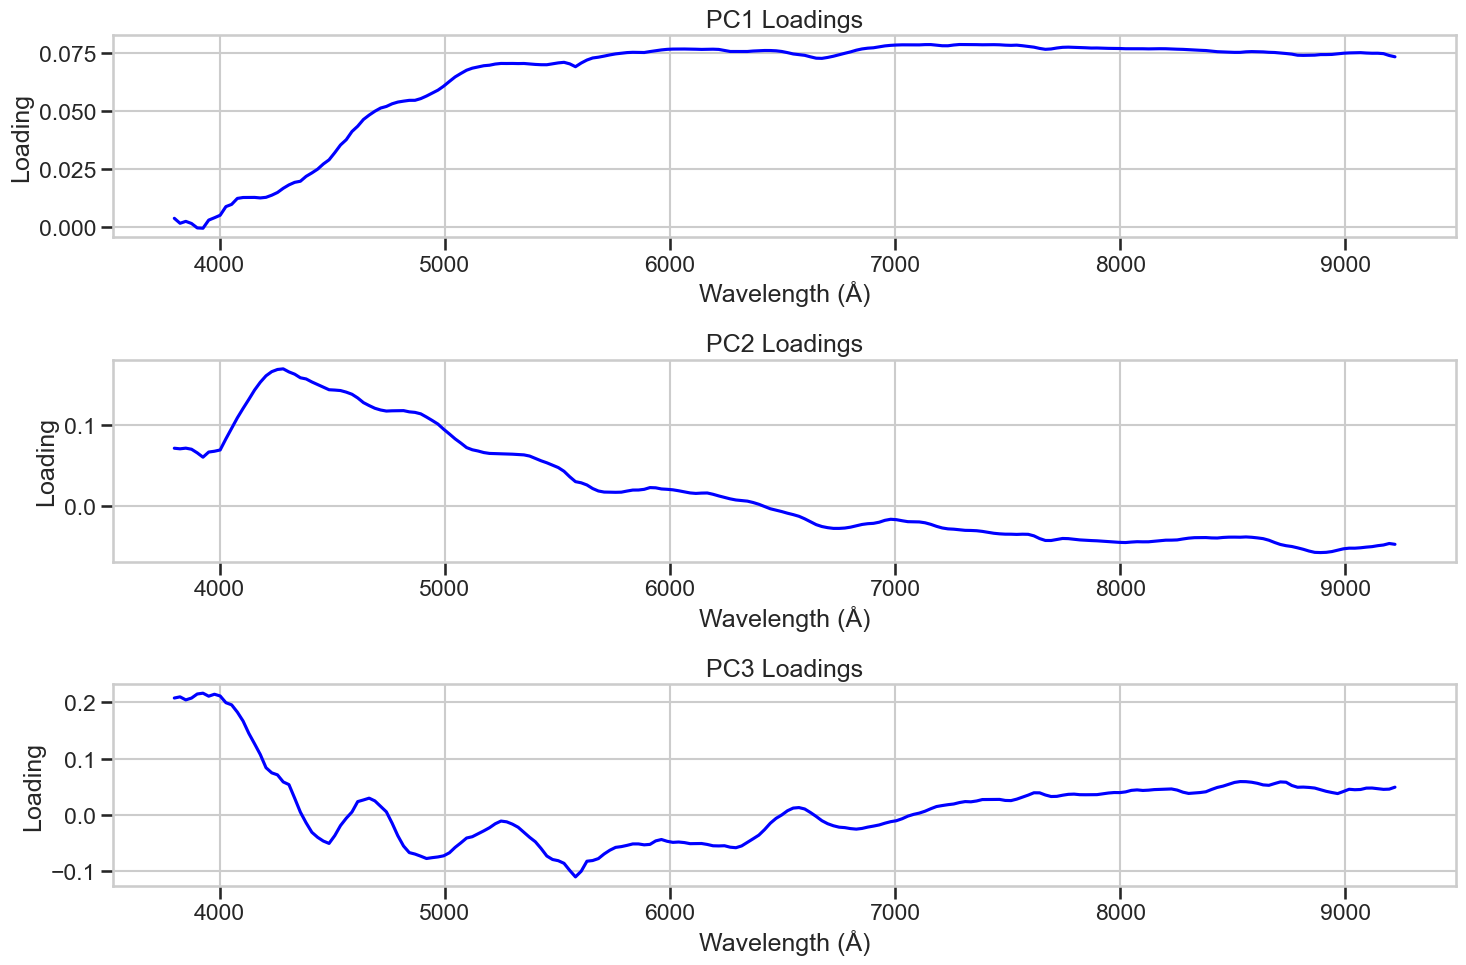

In [15]:
# Plot PC loadings to understand what spectral features contribute to each component
plt.figure(figsize=(15, 10))
for i in range(3):  # Plot first 3 PCs
    plt.subplot(3, 1, i + 1)
    plt.plot(wavelengths, pca.components_[i], "b-")
    plt.title(f"PC{i+1} Loadings")
    plt.xlabel("Wavelength (Å)")
    plt.ylabel("Loading")
    plt.grid(True)
plt.tight_layout()
plt.savefig(f"{output_dir}/pca_loadings.png", dpi=300)

In [16]:
# K-means clustering
print("Performing K-means clustering...")
# Determine optimal K using elbow method
inertia = []
K_range = range(2, 16)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_result[:, :5])  # Use first 5 PCs for clustering
    inertia.append(kmeans.inertia_)

Performing K-means clustering...


Using K=5 for K-means clustering


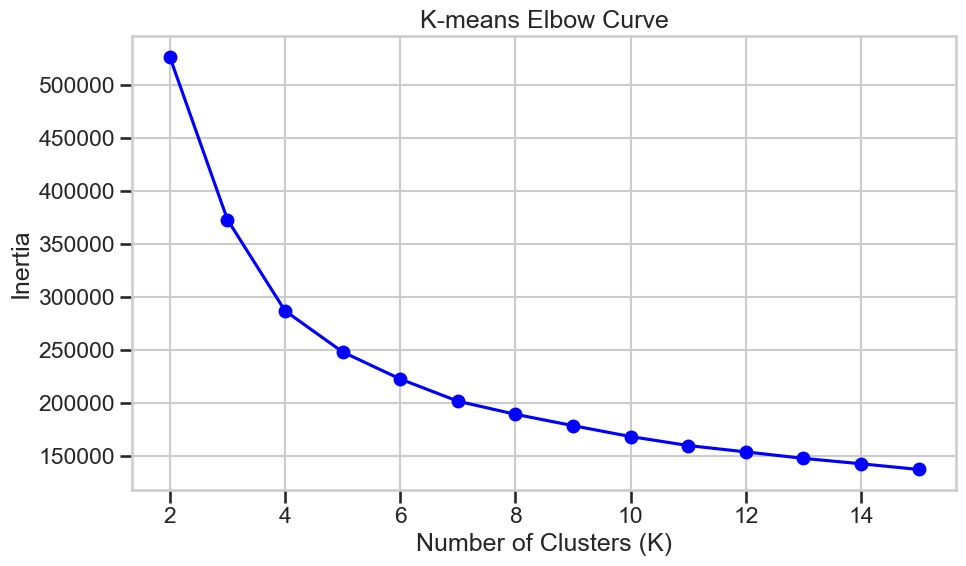

In [17]:
# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, "b-o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("K-means Elbow Curve")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_elbow.png", dpi=300)

# Choose K based on elbow (placeholder - should be determined from plot)
optimal_k = 5
print(f"Using K={optimal_k} for K-means clustering")

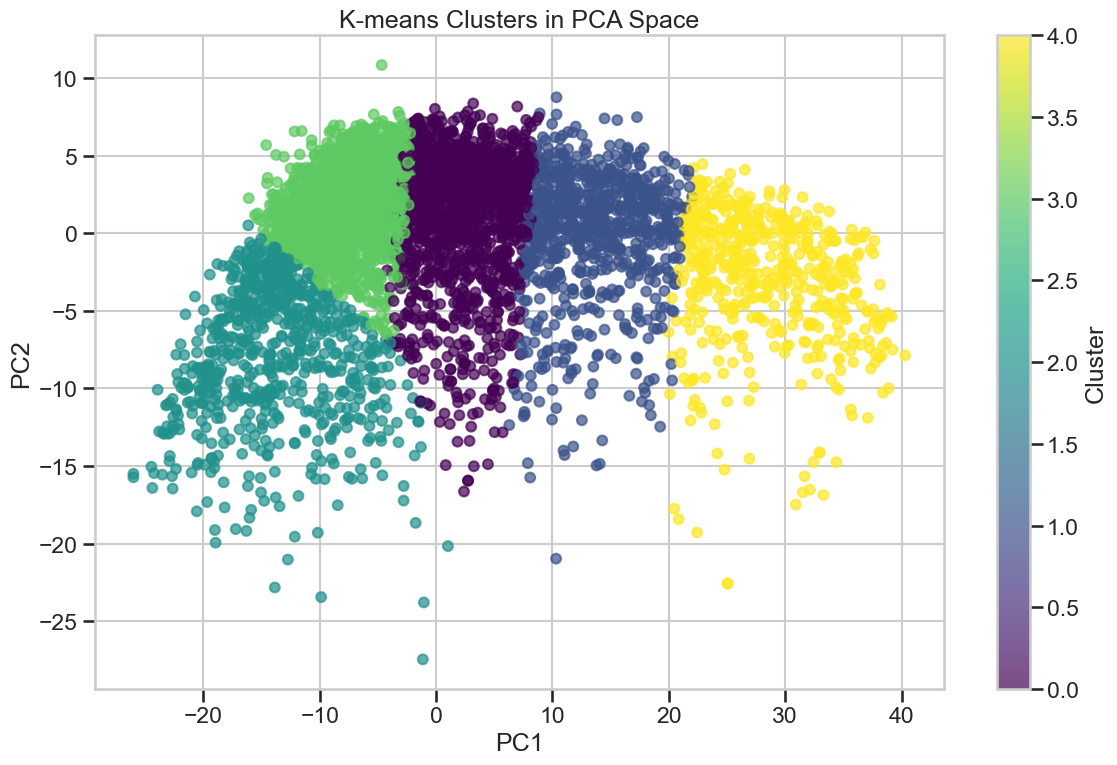

In [18]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_result[:, :5])
spectra_data["Cluster"] = cluster_labels

# Plot clusters in PCA space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=cluster_labels,
    cmap="viridis",
    alpha=0.7,
    s=50,
)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means Clusters in PCA Space")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{output_dir}/kmeans_clusters_pca.png", dpi=300)

In [19]:
# t-SNE for visualization
print("Performing t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(pca_result[:, :10])  # Use first 10 PCs for t-SNE

Performing t-SNE...


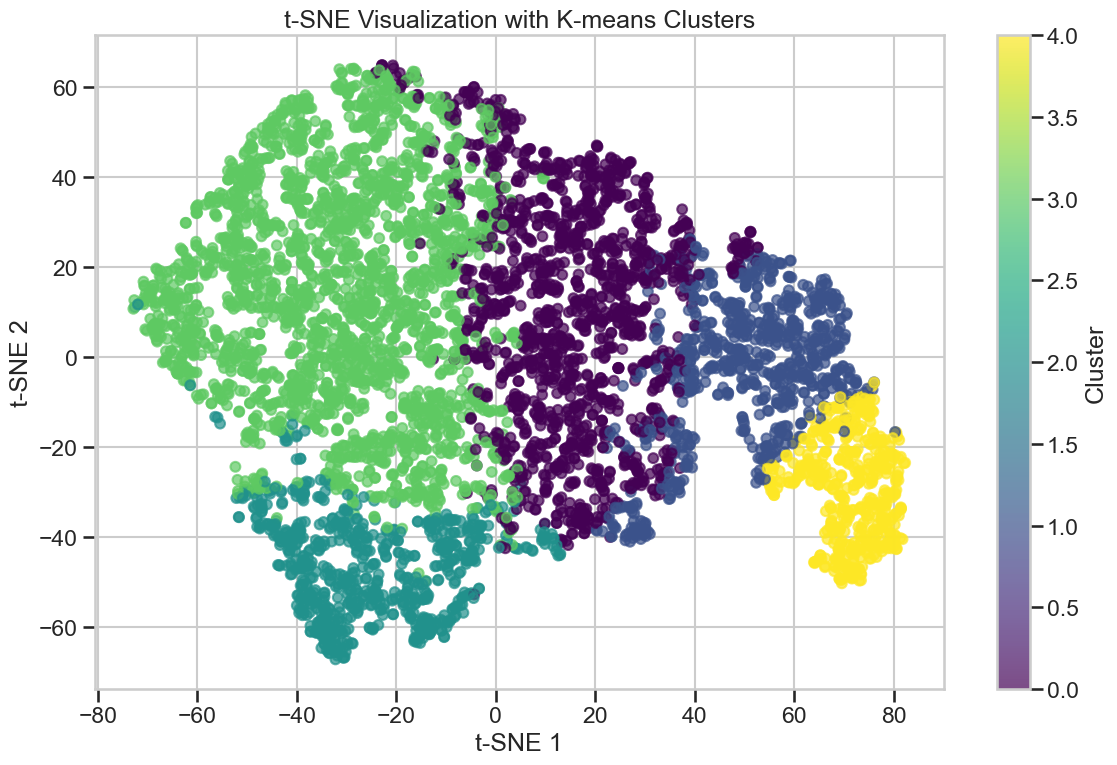

In [20]:
# Plot t-SNE colored by K-means cluster
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    tsne_result[:, 0],
    tsne_result[:, 1],
    c=cluster_labels,
    cmap="viridis",
    alpha=0.7,
    s=50,
)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE Visualization with K-means Clusters")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{output_dir}/tsne_kmeans_clusters.png", dpi=300)